### Regression Trees
We will be using the Boston Housing dataset for our regression example. 
This a dataset which contains information about houses in the suburbs of Boston. 

There are 506 samples and 14 attributes. 

For simplicity and visualization purposes, we will only use two:

    — MEDV (median value of owner-occupied homes) as the target and 
    - LSTAT (percentage of lower status of the population) as the feature
    

In [2]:
import pandas as pd
from sklearn import datasets

boston = datasets.load_boston()
df = pd.DataFrame(boston.data[:, 12]) # Create DataFrame using only the LSAT feature
df.columns = ['LSAT']
df['MEDV'] = boston.target

df.head()



,LSAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


Let’s use the `DecisionTreeRegressor` implemented in `scikit-learn` to train a regression tree:

In [4]:
from sklearn.tree import DecisionTreeRegressor

In [5]:
X = df[['LSAT']].values
y = df['MEDV'].values

sort_idx = X.flatten().argsort() # Sort X and y by ascending values of X

X = X[sort_idx]
y = y[sort_idx]


tree = DecisionTreeRegressor(criterion='mse', max_depth=3)

tree.fit(X,y)

DecisionTreeRegressor(max_depth=3)

The criterion is different from the one we used for our classification tree. 

Entropy as a measure of impurity is a useful criteria for classification. 

To use a decision tree for regression, however, we need an impurity metric that is suitable for continuous variables, so we define the impurity measure using the weighted mean squared error (MSE) of the children nodes instead.

Let’s model the relationship between MEDV and LSTAT to see what the line fit of a regression tree looks like:


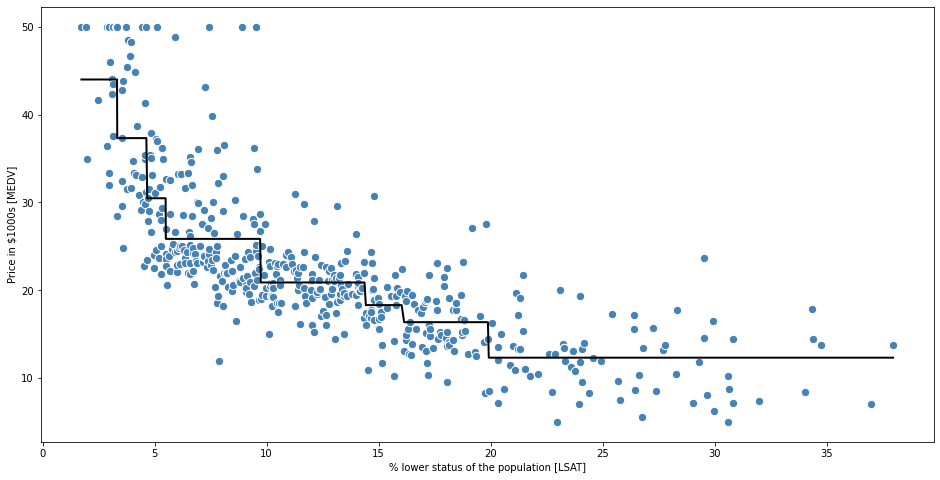

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.scatter(X, y, c='steelblue',
           edgecolor='white', s= 70)
plt.plot(X, tree.predict(X), color='black', lw=2)

plt.xlabel('% lower status of the population [LSAT]')
plt.ylabel('Price in $1000s [MEDV]')

plt.show()



In [9]:
plt.savefig('regression.png')

<Figure size 432x288 with 0 Axes>